In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [20]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle



In [123]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle



def load_training_dataset(model_version = '1.0'):
    '''
        This function is used to load the training dataset chosen with the following information:
    
        + Input:
            - file_path: the training file path.
        + Output:
            - features_data: The dataframe containing the features data for further steps.
            - label_data: the dataframe having the corresponding labels with respect to the features_data
    
        + The training file has the following attributes:
            - user_id
            - phone_type
            - TELCO
            - starting_09X
            - starting_08X
            - is_gmail
            - is_yahoo_email
            - is_educational_email
            - Package
            - Entity_Lead_Source
            - os_version
            - browser_type
        + Remarks: please filter all ELSA users from the training dataset as they are noise data that can affect the prediction results.
        
    '''
    if model_version == '1.0':
        Package= ['lifetime_membership', 
            'one_year_credit',
            'three_months_credit',
            'six_months_credit',
            'one_month_credit',
            'N/A',
            'group_membership',
            'two_years_credit'
        ]
        TELCO = [
            'MOBI',
            'VIETTEL',
            'VNM',
            'VINA',
            'N/A',
            'GM'
        ]
        phone_type = [
            'N/A',
            'Android',
            'iPhone',
            'PC',
            'MacBook'
        ]
        os_version = [
            'N/A',
            'Android 8',
            'Android 9',
            'OS 12_4',
            'Windows NT 10',
            'Android 10',
            'OS 14_2',
            'OS 14_3',
            'Windows NT 6.',
            'OS 13_3',
            'Android 5',
            'OS 13_7',
            'Android 7',
            'OS 14_0',
            'Android 1',
            'OS 11_4',
            'OS 13_5',
            'Android 6',
            'OS 10_3',
            'OS 13_6',
            'Android 4',
            'OS 12_5',
            'OS 13_1',
            'OS 14_1',
            'OS 11_2',
            'OS 11_0',
            'OS 12_3',
            'OS 14_4',
            'OS 13_2',
            'OS 12_1',
            'OS 12_0',
            'OS 12_2',
            'OS 9_2 ',
            'OS 13_4',
            'OS 11_3',
            'OS 9_2_',
            'OS 10_2',
            'Windows NT 5.',
            'OS 14_5',
            'OS 10_1',
            'OS 7_1']
        browser_type = [
            'N/A',
            'Chrome',
            'Safari',
            'Firefox',
            'Opera'
        ]
        Entity_Lead_Source = [
            'N/A',
            'Organic',
            'FB_Inbox',
            'FB_DynamicAds',
            'FB_FA4',
            'FB_FA1',
            'FB_FA2',
            'FB_FA3',
            'GG_YT',
            'GG_SEM',
            'FB_Chatbot',
            'AppSpecial',
            'FB_FA',
            'SaleTeam',
            'CCAds',
            'FB_FA5',
            'Affiliate',
            'FBLG_FA2',
            'FB_Chatbot_Paid',
            'FB_LG',
            'FB_Chatbot_Organic',
            'Promotions',
            'BD',
            'FB_Other',
            'FB_FA6',
            'UpSales',
            'Subscribes'
        ]
        file_path="./training_data/training_dataset_v1.csv"
        training_dataset=pd.read_csv(file_path, index_col = False)
        features_data = training_dataset[['phone_type',
                     'TELCO',
                     'starting_09X',
                     'starting_08X',
                     'is_gmail',
                     'is_yahoo_email',
                     'is_educational_email',
                     'Package',
                     'Entity_Lead_Source',
                     'os_version',
                     'browser_type']].copy()
                     
        features_data = features_data.fillna('N/A')
        for i in features_data.select_dtypes(bool).columns:
            features_data.loc[:,i]=features_data.loc[:,i].apply(lambda x: 0 if x==False else 1)
          
        
        # Label encoding for the column Package
        label_encoder_package = preprocessing.LabelEncoder()
        label_encoder_package.fit(Package)
        features_data["Package"]=label_encoder_package.transform(features_data["Package"])
        
        
        # Label encoding for the column TELCO
        label_encoder_TELCO = preprocessing.LabelEncoder()
        label_encoder_TELCO.fit(TELCO)
        features_data["TELCO"]=label_encoder_TELCO.transform(features_data["TELCO"])
        
        
        # Label encoding for the column phone_type
        label_encoder_phone_type = preprocessing.LabelEncoder()
        label_encoder_phone_type.fit(phone_type)
        features_data["phone_type"]=label_encoder_phone_type.transform(features_data["phone_type"])
        
        
        # Label encoding for the column os_version
        label_encoder_os_version = preprocessing.LabelEncoder()
        label_encoder_os_version.fit(os_version)
        features_data["os_version"]=label_encoder_os_version.transform(features_data["os_version"])
        
        
        # Label encoding for the column browser_type
        label_encoder_browser_type = preprocessing.LabelEncoder()
        label_encoder_browser_type.fit(browser_type)
        features_data["browser_type"]=label_encoder_browser_type.transform(features_data["browser_type"])
        
        
        # Label encoding for the column Entity_Lead_Source
        label_encoder_Entity_Lead_Source = preprocessing.LabelEncoder()
        label_encoder_Entity_Lead_Source.fit(Entity_Lead_Source)
        features_data["Entity_Lead_Source"]=label_encoder_Entity_Lead_Source.transform(features_data["Entity_Lead_Source"])
        
         
                 
        label_data = training_dataset.loc[:,"Is_Converted"]
        label_vector=[1 if i =='Yes' else 0 for i in list(label_data) ]
        return features_data,label_vector
    else:
        print("The latest model has not supported for this version!")
        features_data = []
        label_vector = []
        return features_data,label_vector
     
    
    

def feature_validation(feature_vector, model_version = '1.0'):
    '''
        This function is used to validate the values of a computed feature vector depending on the model version.
        Here, the feature vector has the following fields:
        - phone_type
        - TELCO
        - starting_09X
        - starting_08X
        - is_gmail
        - is_yahoo_email
        - is_educational_email
        - Package
        - Entity_Lead_Source
        - os_version
        - browser_type
        For instance:
            feature_vector = [
                'Android,
                'VIETTEL',
                True,
                False,
                True,
                False,
                False,
                'one_year_credit',
                'Organic',
                'Android 9',
                'Safari'
            ]
    
    '''
    
    if model_version == '1.0': 
                
        Package= ['lifetime_membership', 
            'one_year_credit',
            'three_months_credit',
            'six_months_credit',
            'one_month_credit',
            'N/A',
            'group_membership',
            'two_years_credit'
        ]
        TELCO = [
            'MOBI',
            'VIETTEL',
            'VNM',
            'VINA',
            'N/A',
            'GM'
        ]
        phone_type = [
            'N/A',
            'Android',
            'iPhone',
            'PC',
            'MacBook'
        ]
        os_version = [
            'N/A',
            'Android 8',
            'Android 9',
            'OS 12_4',
            'Windows NT 10',
            'Android 10',
            'OS 14_2',
            'OS 14_3',
            'Windows NT 6.',
            'OS 13_3',
            'Android 5',
            'OS 13_7',
            'Android 7',
            'OS 14_0',
            'Android 1',
            'OS 11_4',
            'OS 13_5',
            'Android 6',
            'OS 10_3',
            'OS 13_6',
            'Android 4',
            'OS 12_5',
            'OS 13_1',
            'OS 14_1',
            'OS 11_2',
            'OS 11_0',
            'OS 12_3',
            'OS 14_4',
            'OS 13_2',
            'OS 12_1',
            'OS 12_0',
            'OS 12_2',
            'OS 9_2 ',
            'OS 13_4',
            'OS 11_3',
            'OS 9_2_',
            'OS 10_2',
            'Windows NT 5.',
            'OS 14_5',
            'OS 10_1',
            'OS 7_1']
        browser_type = [
            'N/A',
            'Chrome',
            'Safari',
            'Firefox',
            'Opera'
        ]
        Entity_Lead_Source = [
            'N/A',
            'Organic',
            'FB_Inbox',
            'FB_DynamicAds',
            'FB_FA4',
            'FB_FA1',
            'FB_FA2',
            'FB_FA3',
            'GG_YT',
            'GG_SEM',
            'FB_Chatbot',
            'AppSpecial',
            'FB_FA',
            'SaleTeam',
            'CCAds',
            'FB_FA5',
            'Affiliate',
            'FBLG_FA2',
            'FB_Chatbot_Paid',
            'FB_LG',
            'FB_Chatbot_Organic',
            'Promotions',
            'BD',
            'FB_Other',
            'FB_FA6',
            'UpSales',
            'Subscribes'
        ]
        validated_feature_vector = feature_vector
        
        if validated_feature_vector[0] not in phone_type: # phone_type
            validated_feature_vector[0] = 'N/A'
            
        if validated_feature_vector[1] not in phone_type: # TELCO
            validated_feature_vector[1] = 'N/A'
            
        if validated_feature_vector[7] not in Package: # Package
            validated_feature_vector[7] = 'N/A'
            
        if validated_feature_vector[8] not in Entity_Lead_Source: # Entity_Lead_Source
            validated_feature_vector[8] = 'N/A'
            
        if validated_feature_vector[9] not in os_version: # os_version
            validated_feature_vector[9] = 'N/A'
            
        if validated_feature_vector[10] not in browser_type: # browser_type
            validated_feature_vector[10] = 'N/A'
        
        return validated_feature_vector
        
    else:
        print("The latest model has not supported for this version!")
        validated_feature_vector  = []
        return validated_feature_vector
        
        
def model_training(model_version = '1.0'):
    '''
        This function is used to train the corresponding model based on the chosen version and store the trained one into a Pickle file.
    '''
    
    if model_version == '1.0':
        features_data,label_vector = load_training_dataset(model_version)
        if len(features_data):
            
            clf = RandomForestClassifier(max_depth=50).fit(features_data, label_vector)
            
            predict_train=clf.predict(X_train)
            print("Train")
            print("accuracy: ",accuracy_score(np.array(predict_train),y_train))
            print("f1 score", f1_score(np.array(predict_train),y_train))
            print("recall score", recall_score(np.array(predict_train),y_train))
            print("precision score", precision_score(np.array(predict_train),y_train))
            
            
            # Save to file in the current working directory
            model_filename = "lead_scoring_model_version_{}.pkl".format(model_version)
            with open(model_filename, 'wb') as file:
                pickle.dump(clf, file)
              
    else:
        print("The latest model has not supported for this version!")
        
        
        
def predict(feature_vectors, model_version = '1.0'):
    
    '''
        This function is used to predict an arraye of feature vectors using the trained model with the chosen version:
        - Input data:
            feature_vectors = 
    '''
         
    if model_version == '1.0':
        
        # Prepare the list of predicted feature vectors after the valdiation step:
        
        predicted_feature_vectors = []
        for feature_vector in feature_vectors:
            validated_feature_vector = feature_validation(feature_vector, model_version)
            predicted_feature_vectors.append(validated_feature_vector)
        
        
        # Load the corresponding model trained from file
        model_filename = "lead_scoring_model_version_{}.pkl".format(model_version)
        with open(model_filename, 'rb') as file:
            trained_model = pickle.load(file)
            
        Results = clf.predict_proba(predicted_feature_vectors)
        
        predicted_probability = []
        for result in Results:
            predicted_probability.append(result[1])
        
        return predicted_probability
        
    else:
        print("The latest model has not supported for this version!")
        return []
        



        
        




    
    
    

In [130]:
features_data,label_vector = load_training_dataset(model_version = '1.0')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [131]:
file_path="./training_data/training_dataset_v1.csv"
training_dataset=pd.read_csv(file_path)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [126]:
feature_data.head(10)

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,2,1,1,0,0,1,0,2,21,8,2
1,2,3,1,0,1,0,0,2,21,8,2
2,2,3,0,0,1,0,0,4,21,8,2
3,2,5,0,0,1,0,0,6,21,8,2
4,2,3,1,0,0,0,0,2,21,8,2
5,2,4,1,0,1,0,0,4,21,8,2
6,2,3,1,0,1,0,0,2,21,8,2
7,2,3,1,0,1,0,0,2,21,8,2
8,2,5,0,0,1,0,0,2,21,8,2
9,2,1,1,0,1,0,0,2,21,8,2


In [55]:
label_vector

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [56]:
feature_data["is_gmail"]

0         False
1          True
2          True
3          True
4         False
          ...  
112573     True
112574     True
112575     True
112576     True
112577     True
Name: is_gmail, Length: 112578, dtype: bool

In [57]:
feature_data["phone_type"]

0         N/A
1         N/A
2         N/A
3         N/A
4         N/A
         ... 
112573    N/A
112574    N/A
112575    N/A
112576    N/A
112577    N/A
Name: phone_type, Length: 112578, dtype: object

<AxesSubplot:>

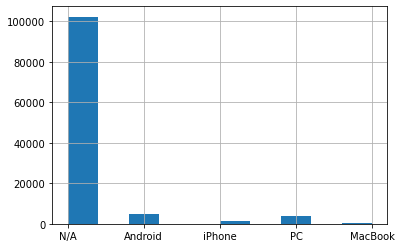

In [58]:
feature_data["phone_type"].hist()

In [59]:
model_version='1.0'

In [60]:
features_data,label_vector = load_training_dataset(model_version)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [61]:
file_path="./training_data/training_dataset_v1.csv"
training_dataset=pd.read_csv(file_path, index_col = False)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
training_dataset

,Unnamed: 0,Id,Package,Entity_Lead_Source,TELCO,starting_09X,starting_08X,is_gmail,is_elsa_email,is_educational_email,is_yahoo_email,phone_type,os_version,browser_type,Is_Converted
0,0,3360854000048638245,lifetime_membership,NaN,MOBI,True,False,False,False,False,True,NaN,NaN,NaN,Yes
1,1,3360854000048623743,lifetime_membership,NaN,VIETTEL,True,False,True,False,False,False,NaN,NaN,NaN,No
2,2,3360854000048620846,one_year_credit,NaN,VIETTEL,False,False,True,False,False,False,NaN,NaN,NaN,Yes
3,3,3360854000048619604,three_months_credit,NaN,VNM,False,False,True,False,False,False,NaN,NaN,NaN,Yes
4,4,3360854000048612957,lifetime_membership,NaN,VIETTEL,True,False,False,False,False,False,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112573,112573,3360854000122125067,one_year_credit,FB_Chatbot_Organic,MOBI,True,False,True,False,False,False,NaN,NaN,NaN,No
112574,112574,3360854000122124192,lifetime_membership,UpSales,MOBI,True,False,True,False,False,False,NaN,NaN,NaN,No
112575,112575,3360854000122124273,one_year_credit,Promotions,MOBI,True,False,True,False,False,False,NaN,NaN,NaN,Yes
112576,112576,3360854000122154128,lifetime_membership,GG_SEM,VINA,True,False,True,False,False,False,NaN,NaN,NaN,No


In [64]:
features_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,True,False,False,True,False,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,True,False,True,False,False,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,False,False,True,False,False,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,False,False,True,False,False,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,True,False,False,False,False,lifetime_membership,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...
112573,N/A,MOBI,True,False,True,False,False,one_year_credit,FB_Chatbot_Organic,N/A,N/A
112574,N/A,MOBI,True,False,True,False,False,lifetime_membership,UpSales,N/A,N/A
112575,N/A,MOBI,True,False,True,False,False,one_year_credit,Promotions,N/A,N/A
112576,N/A,VINA,True,False,True,False,False,lifetime_membership,GG_SEM,N/A,N/A


In [65]:
clf = RandomForestClassifier(max_depth=50).fit(features_data, label_vector)

ValueError: could not convert string to float: 'N/A'

In [46]:
feature_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,NaN,MOBI,True,False,False,True,False,lifetime_membership,NaN,NaN,NaN
1,NaN,VIETTEL,True,False,True,False,False,lifetime_membership,NaN,NaN,NaN
2,NaN,VIETTEL,False,False,True,False,False,one_year_credit,NaN,NaN,NaN
3,NaN,VNM,False,False,True,False,False,three_months_credit,NaN,NaN,NaN
4,NaN,VIETTEL,True,False,False,False,False,lifetime_membership,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
112573,NaN,MOBI,True,False,True,False,False,one_year_credit,FB_Chatbot_Organic,NaN,NaN
112574,NaN,MOBI,True,False,True,False,False,lifetime_membership,UpSales,NaN,NaN
112575,NaN,MOBI,True,False,True,False,False,one_year_credit,Promotions,NaN,NaN
112576,NaN,VINA,True,False,True,False,False,lifetime_membership,GG_SEM,NaN,NaN


In [49]:
features_data = features_data.fillna('N/A')

In [50]:
features_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,True,False,False,True,False,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,True,False,True,False,False,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,False,False,True,False,False,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,False,False,True,False,False,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,True,False,False,False,False,lifetime_membership,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...
112573,N/A,MOBI,True,False,True,False,False,one_year_credit,FB_Chatbot_Organic,N/A,N/A
112574,N/A,MOBI,True,False,True,False,False,lifetime_membership,UpSales,N/A,N/A
112575,N/A,MOBI,True,False,True,False,False,one_year_credit,Promotions,N/A,N/A
112576,N/A,VINA,True,False,True,False,False,lifetime_membership,GG_SEM,N/A,N/A


<AxesSubplot:>

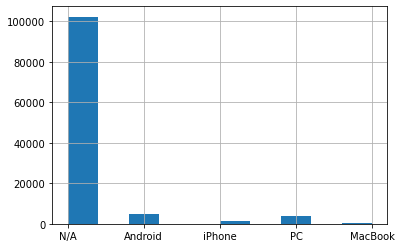

In [71]:
features_data["phone_type"].hist()

<AxesSubplot:>

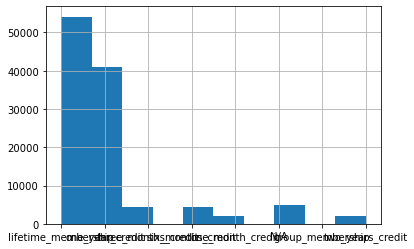

In [72]:
features_data["Package"].hist()

In [73]:
features_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,True,False,False,True,False,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,True,False,True,False,False,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,False,False,True,False,False,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,False,False,True,False,False,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,True,False,False,False,False,lifetime_membership,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...
112573,N/A,MOBI,True,False,True,False,False,one_year_credit,FB_Chatbot_Organic,N/A,N/A
112574,N/A,MOBI,True,False,True,False,False,lifetime_membership,UpSales,N/A,N/A
112575,N/A,MOBI,True,False,True,False,False,one_year_credit,Promotions,N/A,N/A
112576,N/A,VINA,True,False,True,False,False,lifetime_membership,GG_SEM,N/A,N/A


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(features_data.values, label_vector, test_size=0.2, random_state=10)



In [93]:
X_train

array([['N/A', 'MOBI', True, ..., 'N/A', 'N/A', 'N/A'],
       ['N/A', 'MOBI', True, ..., 'N/A', 'N/A', 'N/A'],
       ['N/A', 'MOBI', True, ..., 'FB_FA3', 'N/A', 'N/A'],
       ...,
       ['iPhone', 'VIETTEL', False, ..., 'FB_FA4', 'OS 12_4', 'Safari'],
       ['N/A', 'VIETTEL', True, ..., 'Organic', 'N/A', 'N/A'],
       ['N/A', 'VIETTEL', True, ..., 'FBLG_FA2', 'N/A', 'N/A']],
      dtype=object)

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [90]:
X_train.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [95]:
X=features_data[['phone_type',
 'TELCO',
 'starting_09X',
 'starting_08X',
 'is_gmail',
 'is_yahoo_email',
 'is_educational_email',
 'Package',
 'Entity_Lead_Source',
 'os_version',
 'browser_type']].copy()

In [96]:
for i in X.select_dtypes(bool).columns:
  X.loc[:,i]=X.loc[:,i].apply(lambda x: "F" if x==False else "T")

In [97]:
X.head(10)

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,T,F,F,T,F,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,F,F,T,F,F,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,F,F,T,F,F,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,T,F,F,F,F,lifetime_membership,N/A,N/A,N/A
5,N/A,VINA,T,F,T,F,F,one_year_credit,N/A,N/A,N/A
6,N/A,VIETTEL,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A
7,N/A,VIETTEL,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A
8,N/A,VNM,F,F,T,F,F,lifetime_membership,N/A,N/A,N/A
9,N/A,MOBI,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A


In [101]:
features_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,True,False,False,True,False,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,True,False,True,False,False,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,False,False,True,False,False,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,False,False,True,False,False,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,True,False,False,False,False,lifetime_membership,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...
112573,N/A,MOBI,True,False,True,False,False,one_year_credit,FB_Chatbot_Organic,N/A,N/A
112574,N/A,MOBI,True,False,True,False,False,lifetime_membership,UpSales,N/A,N/A
112575,N/A,MOBI,True,False,True,False,False,one_year_credit,Promotions,N/A,N/A
112576,N/A,VINA,True,False,True,False,False,lifetime_membership,GG_SEM,N/A,N/A


In [102]:
for i in features_data.select_dtypes(bool).columns:
          features_data.loc[:,i]=features_data.loc[:,i].apply(lambda x: "F" if x==False else "T")

In [103]:
features_data.head()

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,T,F,F,T,F,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,F,F,T,F,F,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,F,F,T,F,F,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,T,F,F,F,F,lifetime_membership,N/A,N/A,N/A


In [105]:
features_data.columns

Index(['phone_type', 'TELCO', 'starting_09X', 'starting_08X', 'is_gmail',
       'is_yahoo_email', 'is_educational_email', 'Package',
       'Entity_Lead_Source', 'os_version', 'browser_type'],
      dtype='object')

In [106]:
Package= ['lifetime_membership', 
            'one_year_credit',
            'three_months_credit',
            'six_months_credit',
            'one_month_credit',
            'N/A',
            'group_membership',
            'two_years_credit'
        ]
TELCO = [
            'MOBI',
            'VIETTEL',
            'VNM',
            'VINA',
            'N/A',
            'GM'
        ]
phone_type = [
            'N/A',
            'Android',
            'iPhone',
            'PC',
            'MacBook'
        ]
os_version = [
            'N/A',
            'Android 8',
            'Android 9',
            'OS 12_4',
            'Windows NT 10',
            'Android 10',
            'OS 14_2',
            'OS 14_3',
            'Windows NT 6.',
            'OS 13_3',
            'Android 5',
            'OS 13_7',
            'Android 7',
            'OS 14_0',
            'Android 1',
            'OS 11_4',
            'OS 13_5',
            'Android 6',
            'OS 10_3',
            'OS 13_6',
            'Android 4',
            'OS 12_5',
            'OS 13_1',
            'OS 14_1',
            'OS 11_2',
            'OS 11_0',
            'OS 12_3',
            'OS 14_4',
            'OS 13_2',
            'OS 12_1',
            'OS 12_0',
            'OS 12_2',
            'OS 9_2 ',
            'OS 13_4',
            'OS 11_3',
            'OS 9_2_',
            'OS 10_2',
            'Windows NT 5.',
            'OS 14_5',
            'OS 10_1',
            'OS 7_1']
browser_type = [
            'N/A',
            'Chrome',
            'Safari',
            'Firefox',
            'Opera'
        ]
Entity_Lead_Source = [
            'N/A',
            'Organic',
            'FB_Inbox',
            'FB_DynamicAds',
            'FB_FA4',
            'FB_FA1',
            'FB_FA2',
            'FB_FA3',
            'GG_YT',
            'GG_SEM',
            'FB_Chatbot',
            'AppSpecial',
            'FB_FA',
            'SaleTeam',
            'CCAds',
            'FB_FA5',
            'Affiliate',
            'FBLG_FA2',
            'FB_Chatbot_Paid',
            'FB_LG',
            'FB_Chatbot_Organic',
            'Promotions',
            'BD',
            'FB_Other',
            'FB_FA6',
            'UpSales',
            'Subscribes'
        ]

In [108]:
from sklearn import preprocessing

In [114]:
label_encoder_package = preprocessing.LabelEncoder()

In [115]:
label_encoder_package.fit(Package)

LabelEncoder()

In [116]:
label_encoder_package.classes_


array(['N/A', 'group_membership', 'lifetime_membership',
       'one_month_credit', 'one_year_credit', 'six_months_credit',
       'three_months_credit', 'two_years_credit'], dtype='<U19')

In [118]:
features_data.head()

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,T,F,F,T,F,lifetime_membership,N/A,N/A,N/A
1,N/A,VIETTEL,T,F,T,F,F,lifetime_membership,N/A,N/A,N/A
2,N/A,VIETTEL,F,F,T,F,F,one_year_credit,N/A,N/A,N/A
3,N/A,VNM,F,F,T,F,F,three_months_credit,N/A,N/A,N/A
4,N/A,VIETTEL,T,F,F,F,F,lifetime_membership,N/A,N/A,N/A


In [119]:
features_data["Package"]=label_encoder_package.transform(features_data["Package"])

In [120]:
features_data.head()

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,N/A,MOBI,T,F,F,T,F,2,N/A,N/A,N/A
1,N/A,VIETTEL,T,F,T,F,F,2,N/A,N/A,N/A
2,N/A,VIETTEL,F,F,T,F,F,4,N/A,N/A,N/A
3,N/A,VNM,F,F,T,F,F,6,N/A,N/A,N/A
4,N/A,VIETTEL,T,F,F,F,F,2,N/A,N/A,N/A


In [127]:
label_encoder_package.transform(["one_month_credit"])[0]

3

In [121]:
# Label encoding for the column TELCO
label_encoder_TELCO = preprocessing.LabelEncoder()
label_encoder_TELCO.fit(TELCO)
features_data["TELCO"]=label_encoder_TELCO.transform(features_data["TELCO"])
        
        
# Label encoding for the column phone_type
label_encoder_phone_type = preprocessing.LabelEncoder()
label_encoder_phone_type.fit(phone_type)
features_data["phone_type"]=label_encoder_phone_type.transform(features_data["phone_type"])


# Label encoding for the column os_version
label_encoder_os_version = preprocessing.LabelEncoder()
label_encoder_os_version.fit(os_version)
features_data["os_version"]=label_encoder_os_version.transform(features_data["os_version"])


# Label encoding for the column browser_type
label_encoder_browser_type = preprocessing.LabelEncoder()
label_encoder_browser_type.fit(browser_type)
features_data["browser_type"]=label_encoder_browser_type.transform(features_data["browser_type"])


# Label encoding for the column Entity_Lead_Source
label_encoder_Entity_Lead_Source = preprocessing.LabelEncoder()
label_encoder_Entity_Lead_Source.fit(Entity_Lead_Source)
features_data["Entity_Lead_Source"]=label_encoder_Entity_Lead_Source.transform(features_data["Entity_Lead_Source"])

In [133]:
features_data.head(10)

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,2,1,1,0,0,1,0,2,21,8,2
1,2,3,1,0,1,0,0,2,21,8,2
2,2,3,0,0,1,0,0,4,21,8,2
3,2,5,0,0,1,0,0,6,21,8,2
4,2,3,1,0,0,0,0,2,21,8,2
5,2,4,1,0,1,0,0,4,21,8,2
6,2,3,1,0,1,0,0,2,21,8,2
7,2,3,1,0,1,0,0,2,21,8,2
8,2,5,0,0,1,0,0,2,21,8,2
9,2,1,1,0,1,0,0,2,21,8,2


In [132]:
features_data

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,2,1,1,0,0,1,0,2,21,8,2
1,2,3,1,0,1,0,0,2,21,8,2
2,2,3,0,0,1,0,0,4,21,8,2
3,2,5,0,0,1,0,0,6,21,8,2
4,2,3,1,0,0,0,0,2,21,8,2
...,...,...,...,...,...,...,...,...,...,...,...
112573,2,1,1,0,1,0,0,4,6,8,2
112574,2,1,1,0,1,0,0,2,26,8,2
112575,2,1,1,0,1,0,0,4,23,8,2
112576,2,4,1,0,1,0,0,2,19,8,2


In [134]:
clf = RandomForestClassifier(max_depth=50).fit(features_data, label_vector)

In [98]:
X_data=X.copy()
X_data_one=X.copy()

In [99]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in X_data_one.select_dtypes(object):
  X_data_one.loc[:,i]=label_encoder.fit_transform(X.loc[:,i])

In [100]:
X_data_one

,phone_type,TELCO,starting_09X,starting_08X,is_gmail,is_yahoo_email,is_educational_email,Package,Entity_Lead_Source,os_version,browser_type
0,2,1,1,0,0,1,0,2,21,8,2
1,2,3,1,0,1,0,0,2,21,8,2
2,2,3,0,0,1,0,0,4,21,8,2
3,2,5,0,0,1,0,0,6,21,8,2
4,2,3,1,0,0,0,0,2,21,8,2
...,...,...,...,...,...,...,...,...,...,...,...
112573,2,1,1,0,1,0,0,4,6,8,2
112574,2,1,1,0,1,0,0,2,26,8,2
112575,2,1,1,0,1,0,0,4,23,8,2
112576,2,4,1,0,1,0,0,2,19,8,2


In [84]:
clf = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

ValueError: could not convert string to float: 'N/A'

In [75]:
label_vector

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

In [66]:
X

array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],
       [-2.9728827 , -1.08878294,  0.70885958,  0.42281857],
       [-0.59614125, -1.37007001, -3.11685659,  0.64445203],
       ...,
       [ 0.91711204,  1.10596645,  0.86766522, -2.25625012],
       [ 0.10027664,  1.45875846, -0.44360274, -0.67002328],
       [ 1.0415229 , -0.01987143,  0.15216419, -1.9405334 ]])

In [5]:
len(X)

1000

In [67]:
X[0]

array([-1.66853167, -1.29901346,  0.2746472 , -0.60362044])

In [69]:
np.array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],[-1.66853167, -1.29901346,  0.2746472 , -0.60362044]])

array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],
       [-1.66853167, -1.29901346,  0.2746472 , -0.60362044]])

In [6]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [7]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [9]:
print(clf.predict([[0, 0, 0, 0],[1,1,3,4]]))

[1 1]


In [10]:
print(clf.predict_proba([[0, 0, 0, 0]]))

[[0.17806162 0.82193838]]


In [11]:
print(clf.predict_proba([[0, 0, 0, 0],[1,1,3,4]]))

[[0.17806162 0.82193838]
 [0.24010118 0.75989882]]


In [12]:
Results = clf.predict_proba([[0, 0, 0, 0],[1,1,3,4]])

In [14]:
Results[0][1]

0.8219383816523785